***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv('dados.csv.bz2')

### Visualize o conteúdo do DataFrame

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

In [11]:
dados['Renda'].min()

0

In [12]:
dados['Renda'].max()

200000

### 1º Definir os intevalos das classes em reais (R$)

In [75]:
intervalos_classes = (np.array([0, 2, 5, 15, 25, 999999]) * 788).tolist()
intervalos_classes

[0, 1576, 3940, 11820, 19700, 787999212]

### 2º Definir os labels das classes

In [76]:
labels_classes = ['E', 'D', 'C', 'B', 'A']
labels_classes

['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [77]:
frequencia = pd.value_counts(
  pd.cut(x = dados['Renda'],
         bins = intervalos_classes,
         labels = labels_classes,
         include_lowest = True)
)
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [78]:
percentual = pd.value_counts(
  pd.cut(x = dados['Renda'],
         bins = intervalos_classes,
         labels = labels_classes,
         include_lowest = True),
  normalize = True
)
percentual

E    0.647514
D    0.242087
C    0.094235
B    0.010698
A    0.005466
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [80]:
dist_freq_renda = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_renda.sort_index(ascending=False)

,Frequência,Porcentagem (%)
A,420,0.005466
B,822,0.010698
C,7241,0.094235
D,18602,0.242087
E,49755,0.647514


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

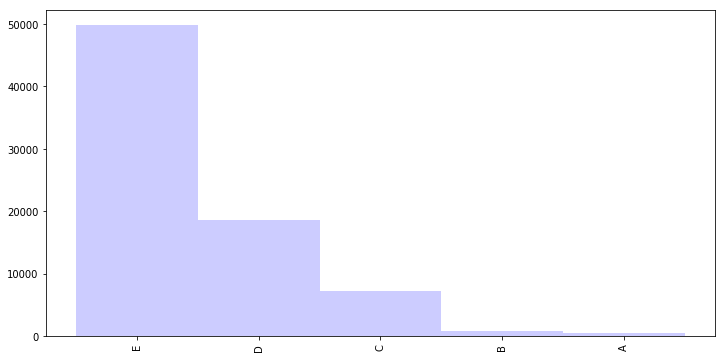

In [86]:
dist_freq_renda['Frequência'].plot.bar(width=1, color='blue', alpha=0.2, figsize=(12, 6))

> ### Conclusões

Escreva suas conclusões aqui...

In [92]:
dados['Classe'] = pd.cut(x = dados['Renda'],
         bins = intervalos_classes,
         labels = labels_classes,
         include_lowest = True)
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Classe
0,11,0,23,8,12,800,1.603808,E
1,11,1,23,2,12,1150,1.739790,E
2,11,1,35,8,15,880,1.760444,E
3,11,0,46,2,6,3500,1.783158,D
4,11,1,47,8,9,150,1.690631,E


### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [115]:
dados[['Idade', 'Renda', 'Altura']].describe()

,Idade,Renda,Altura
count,76840.000000,76840.000000,76840.000000
mean,44.071421,2000.383199,1.699512
std,12.480583,3323.387730,0.079717
min,13.000000,0.000000,1.339245
25%,34.000000,788.000000,1.645785
50%,43.000000,1200.000000,1.699325
75%,53.000000,2000.000000,1.753062
max,99.000000,200000.000000,2.028497


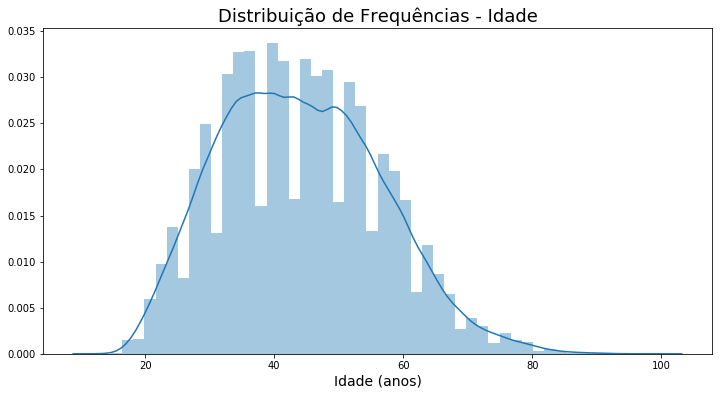

In [94]:
ax = sns.distplot(dados['Idade'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Idade', fontsize=18)
ax.set_xlabel('Idade (anos)', fontsize=14)
ax

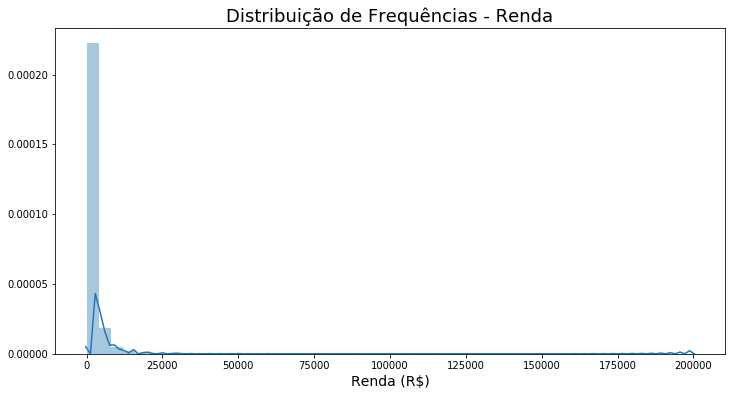

In [102]:
ax = sns.distplot(dados['Renda'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Renda', fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=14)
ax

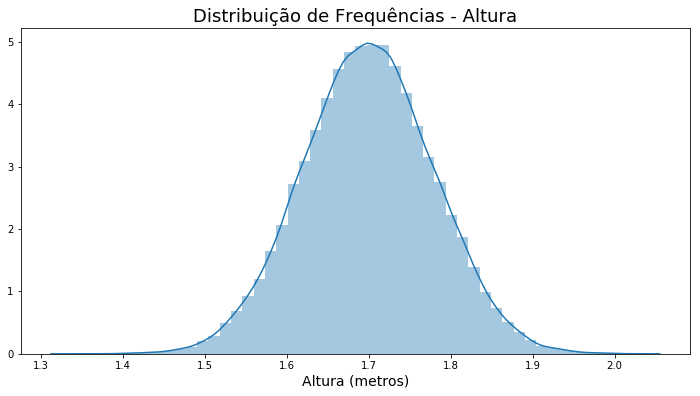

In [97]:
ax = sns.distplot(dados['Altura'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Altura (metros)', fontsize=14)
ax

> ### Conclusões

Escreva suas conclusões aqui...

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

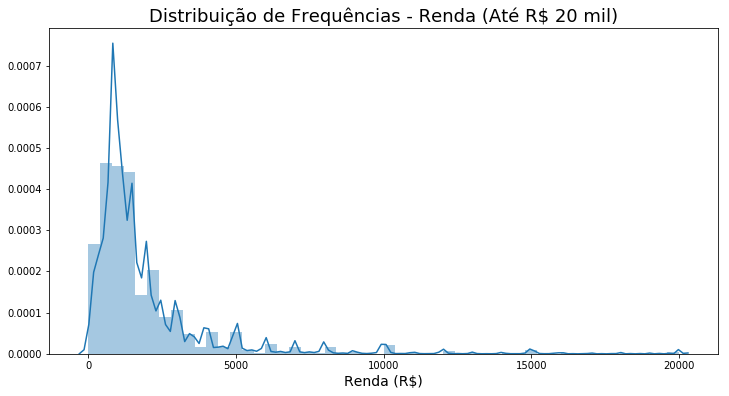

In [104]:
ax = sns.distplot(dados.query('Renda <= 20000')['Renda'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Renda (Até R$ 20 mil)', fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=14)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [106]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [114]:
dados[['Sexo', 'Cor', 'UF', 'Anos de Estudo']].head()

,Sexo,Cor,UF,Anos de Estudo
0,0,8,11,12
1,1,2,11,12
2,1,8,11,15
3,0,2,11,6
4,1,8,11,9


In [108]:
frequencia = pd.crosstab(dados['Sexo'], dados['Cor'])
frequencia.rename(index=sexo, inplace=True)
frequencia.rename(columns=cor, inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [109]:
percentual = pd.crosstab(dados['Sexo'], dados['Cor'], normalize=True) * 100
percentual.rename(index=sexo, inplace=True)
percentual.rename(columns=cor, inplace=True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [110]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Classe
0,11,0,23,8,12,800,1.603808,E
1,11,1,23,2,12,1150,1.739790,E
2,11,1,35,8,15,880,1.760444,E
3,11,0,46,2,6,3500,1.783158,D
4,11,1,47,8,9,150,1.690631,E


In [116]:
dados['Nome UF'] = dados['UF'].map(uf)
dados['Nome Sexo'] = dados['Sexo'].map(sexo)
dados['Nome Cor'] = dados['Cor'].map(cor)
dados['Nome Estudo'] = dados['Anos de Estudo'].map(anos_de_estudo)
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Classe,Nome UF,Nome Sexo,Nome Cor,Nome Estudo
0,11,0,23,8,12,800,1.603808,E,Rondônia,Masculino,Parda,11 anos
1,11,1,23,2,12,1150,1.739790,E,Rondônia,Feminino,Branca,11 anos
2,11,1,35,8,15,880,1.760444,E,Rondônia,Feminino,Parda,14 anos
3,11,0,46,2,6,3500,1.783158,D,Rondônia,Masculino,Branca,5 anos
4,11,1,47,8,9,150,1.690631,E,Rondônia,Feminino,Parda,8 anos


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

In [117]:
dados['Renda'].describe()

count     76840.000000
mean       2000.383199
std        3323.387730
min           0.000000
25%         788.000000
50%        1200.000000
75%        2000.000000
max      200000.000000
Name: Renda, dtype: float64

### Obtenha a média aritimética

In [118]:
dados['Renda'].mean()

2000.3831988547631

### Obtenha a mediana

In [119]:
dados['Renda'].median()

1200.0

### Obtenha a moda

In [120]:
dados['Renda'].mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [121]:
dados['Renda'].mad()

1526.4951371638058

### Obtenha a variância

In [122]:
dados['Renda'].var()

11044906.006217021

### Obtenha o desvio-padrão

In [123]:
dados['Renda'].std()

3323.387730346404

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [126]:
dados.groupby(['Nome Sexo', 'Nome Cor'])[['Renda']].mean()

Renda
Nome Sexo Nome Cor             
Feminino  Amarela   3027.341880
          Branca    2109.866750
          Indígena  2464.386139
          Parda     1176.758516
          Preta     1134.596400
Masculino Amarela   4758.251064
          Branca    2925.744435
          Indígena  1081.710938
          Parda     1659.577425
          Preta     1603.861687

In [128]:
pd.crosstab(dados['Nome Sexo'],
            dados['Nome Cor'],
            aggfunc = ['mean', 'median', 'max'],
            values = dados['Renda']).T

Nome Sexo             Feminino      Masculino
       Nome Cor                              
mean   Amarela     3027.341880    4758.251064
       Branca      2109.866750    2925.744435
       Indígena    2464.386139    1081.710938
       Parda       1176.758516    1659.577425
       Preta       1134.596400    1603.861687
median Amarela     1500.000000    2800.000000
       Branca      1200.000000    1700.000000
       Indígena     788.000000     797.500000
       Parda        800.000000    1200.000000
       Preta        800.000000    1200.000000
max    Amarela    20000.000000   50000.000000
       Branca    100000.000000  200000.000000
       Indígena  120000.000000   10000.000000
       Parda      30000.000000  100000.000000
       Preta      23000.000000   50000.000000

In [132]:
# outra forma de fazer:
sexo_cor = pd.crosstab(dados['Sexo'],
            dados['Cor'],
            aggfunc = ['mean', 'median', 'max'],
            values = dados['Renda'])
sexo_cor.rename(index=sexo, inplace=True)
sexo_cor.rename(columns=cor, inplace=True)
sexo_cor.T

Sexo                 Masculino       Feminino
       Cor                                   
mean   Indígena    1081.710938    2464.386139
       Branca      2925.744435    2109.866750
       Preta       1603.861687    1134.596400
       Amarela     4758.251064    3027.341880
       Parda       1659.577425    1176.758516
median Indígena     797.500000     788.000000
       Branca      1700.000000    1200.000000
       Preta       1200.000000     800.000000
       Amarela     2800.000000    1500.000000
       Parda       1200.000000     800.000000
max    Indígena   10000.000000  120000.000000
       Branca    200000.000000  100000.000000
       Preta      50000.000000   23000.000000
       Amarela    50000.000000   20000.000000
       Parda     100000.000000   30000.000000

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [130]:
dados.groupby(['Nome Sexo', 'Nome Cor'])[['Renda']].std()

Renda
Nome Sexo Nome Cor              
Feminino  Amarela    3731.173660
          Branca     3251.013154
          Indígena  11957.498292
          Parda      1596.233048
          Preta      1349.799809
Masculino Amarela    5740.824820
          Branca     4750.791872
          Indígena   1204.093490
          Parda      2312.087184
          Preta      1936.309271

In [133]:
# outra forma de fazer:
sexo_cor = pd.crosstab(dados['Sexo'],
            dados['Cor'],
            aggfunc = ['mad', 'var', 'std'],
            values = dados['Renda'])
sexo_cor.rename(index=sexo, inplace=True)
sexo_cor.rename(columns=cor, inplace=True)
sexo_cor.T

Sexo             Masculino      Feminino
    Cor                                 
mad Indígena  7.989109e+02  3.007893e+03
    Branca    2.261012e+03  1.670967e+03
    Preta     9.756025e+02  7.054534e+02
    Amarela   3.709597e+03  2.549146e+03
    Parda     1.125828e+03  8.115809e+02
var Indígena  1.449841e+06  1.429818e+08
    Branca    2.257002e+07  1.056909e+07
    Preta     3.749294e+06  1.821960e+06
    Amarela   3.295707e+07  1.392166e+07
    Parda     5.345747e+06  2.547960e+06
std Indígena  1.204093e+03  1.195750e+04
    Branca    4.750792e+03  3.251013e+03
    Preta     1.936309e+03  1.349800e+03
    Amarela   5.740825e+03  3.731174e+03
    Parda     2.312087e+03  1.596233e+03

In [183]:
# outra forma de fazer:
sexo_cor = pd.crosstab(dados['Cor'],
            dados['Sexo'],
            aggfunc = ['mad', 'var', 'std'],
            values = dados['Renda'])
sexo_cor.rename(index=cor, inplace=True)
sexo_cor.rename(columns=sexo, inplace=True)
sexo_cor

mad                        var                        std  \
Sexo        Masculino     Feminino     Masculino      Feminino    Masculino   
Cor                                                                           
Indígena   798.910889  3007.892952  1.449841e+06  1.429818e+08  1204.093490   
Branca    2261.012346  1670.967106  2.257002e+07  1.056909e+07  4750.791872   
Preta      975.602482   705.453357  3.749294e+06  1.821960e+06  1936.309271   
Amarela   3709.597211  2549.146322  3.295707e+07  1.392166e+07  5740.824820   
Parda     1125.827704   811.580946  5.345747e+06  2.547960e+06  2312.087184   

                        
Sexo          Feminino  
Cor                     
Indígena  11957.498292  
Branca     3251.013154  
Preta      1349.799809  
Amarela    3731.173660  
Parda      1596.233048

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

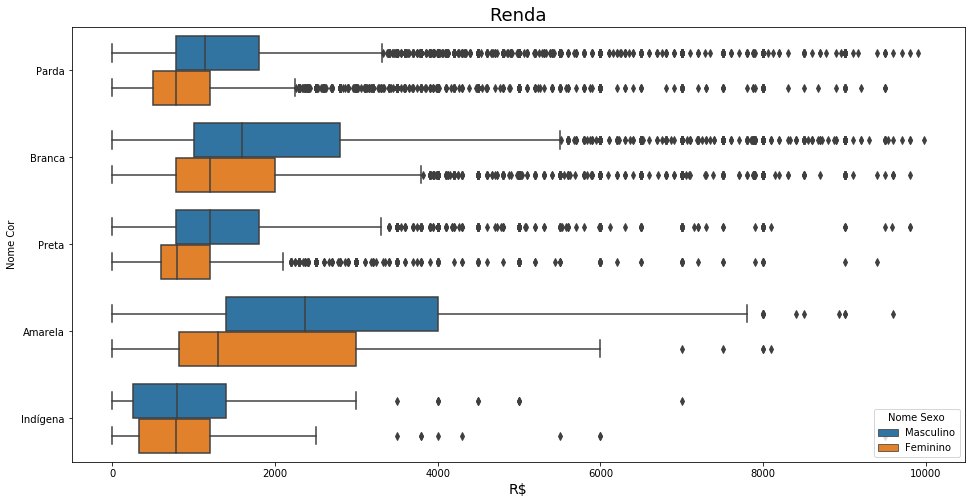

In [135]:
ax = sns.boxplot(x='Renda', y='Nome Cor', hue='Nome Sexo',
                 data=dados.query('Renda < 10000'), orient='h')
ax.figure.set_size_inches(16, 8)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [137]:
len(dados[dados.Renda <= 788]) / len(dados) * 100

28.86777719937533

In [138]:
from scipy import stats

In [144]:
stats.percentileofscore(dados['Renda'], 788, kind='weak')

28.86777719937533

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [147]:
dados['Renda'].quantile(0.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [149]:
# outra forma de fazer:
estudo_sexo = pd.crosstab(dados['Anos de Estudo'],
            dados['Sexo'],
            aggfunc = ['mean', 'median', 'max', 'std'],
            values = dados['Renda'])
estudo_sexo.rename(index=anos_de_estudo, inplace=True)
estudo_sexo.rename(columns=sexo, inplace=True)
estudo_sexo

mean                 median           \
Sexo                              Masculino     Feminino Masculino Feminino   
Anos de Estudo                                                                
Sem instrução e menos de 1 ano   799.494638   516.201748       700      390   
1 ano                            895.629047   492.771987       788      400   
2 anos                           931.178986   529.911638       788      450   
3 anos                          1109.203862   546.853916       800      500   
4 anos                          1302.329283   704.279111      1000      788   
5 anos                          1338.653218   781.389776      1045      788   
6 anos                          1448.875419   833.732824      1200      788   
7 anos                          1465.497940   830.751004      1200      788   
8 anos                          1639.396667   933.615351      1300      800   
9 anos                          1508.038850   868.021700      1200      788   
10 anos                         1731.270847   925.919225      1218      800   
11 anos                         2117.060504  1286.790889      1500     1000   
12 anos                         2470.330776  1682.313725      1800     1200   
13 anos                         3195.099154  1911.730047      2400     1300   
14 anos                         3706.620269  2226.460457      2500     1600   
15 anos ou mais                 6134.279790  3899.513231      4000     2800   
Não determinados                1295.761905   798.174419      1200      788   

                                     max                   std               
Sexo                           Masculino Feminino    Masculino     Feminino  
Anos de Estudo                                                               
Sem instrução e menos de 1 ano     30000    10000  1023.904884   639.311534  
1 ano                              30000     2000  1331.950552   425.291842  
2 anos                             40000     4000  1435.173827   498.234168  
3 anos                             80000     3500  2143.800133   424.124446  
4 anos                             50000    10000  1419.821787   629.553397  
5 anos                             35000     8000  1484.650587   635.782641  
6 anos                             25000     6000  1476.628602   574.547028  
7 anos                             40000     9000  1419.708673   602.038029  
8 anos                             30000    18000  1515.583715   896.781213  
9 anos                             60000    20000  2137.664774   973.221652  
10 anos                            45000     6000  2078.609734   620.611907  
11 anos                           200000   100000  2676.538942  1819.040417  
12 anos                            30000   120000  2268.081538  4851.833513  
13 anos                            25000    20000  2797.116800  2053.789771  
14 anos                            50000    20000  3987.214974  2064.083336  
15 anos ou mais                   200000   100000  7447.613594  4212.770709  
Não determinados                    7000     3000   979.648745   459.985964

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

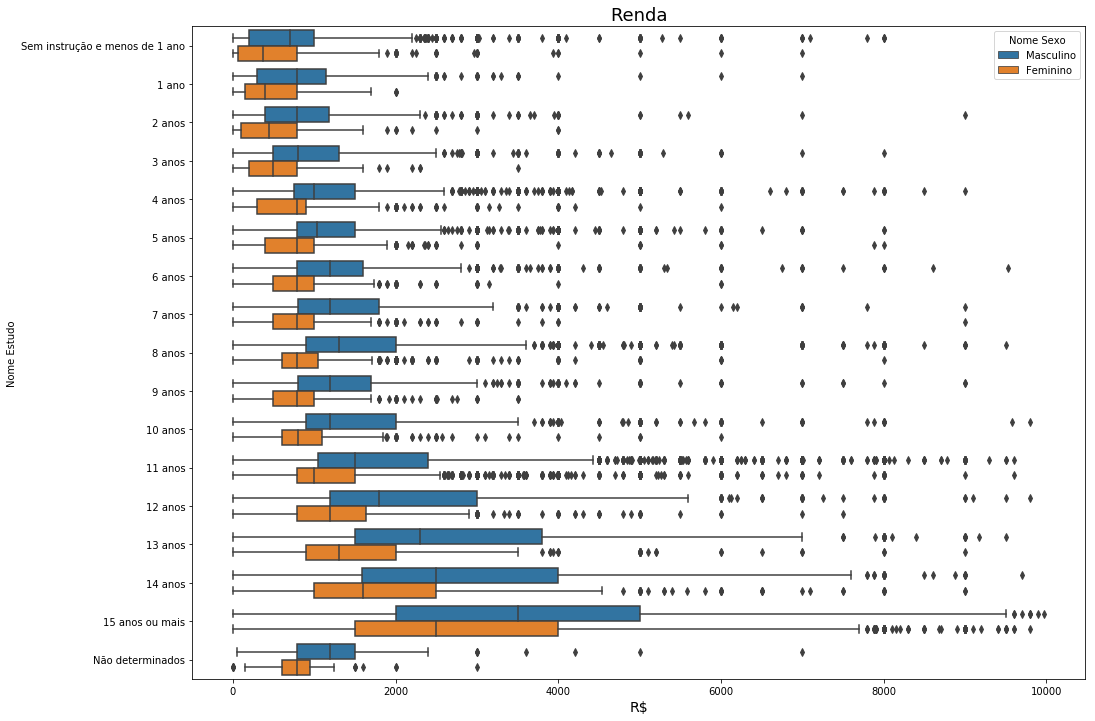

In [186]:
ax = sns.boxplot(x='Renda', y='Nome Estudo', hue='Nome Sexo',
                 data=dados.query('Renda < 10000'), orient='h',
                 order=list(anos_de_estudo.values()))
ax.figure.set_size_inches(16, 12)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [156]:
dados.groupby(['Nome UF'])['Renda'].agg(['mean', 'median', 'max', 'std'])

,mean,median,max,std
Nome UF,,,,
Acre,1506.091782,900,30000,2276.233415
Alagoas,1144.552602,788,11000,1237.856197
Amapá,1861.353516,1200,15580,2020.688632
Amazonas,1445.130100,900,22000,1757.935591
Bahia,1429.645094,800,200000,3507.917248
Ceará,1255.403692,789,25000,1821.963536
Distrito Federal,4241.954722,2000,100000,5550.463338
Espírito Santo,2026.383852,1274,100000,3513.846868
Goiás,1994.580794,1500,30000,2221.933065


### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

In [180]:
ufs = list(uf.values())
ufs.sort()

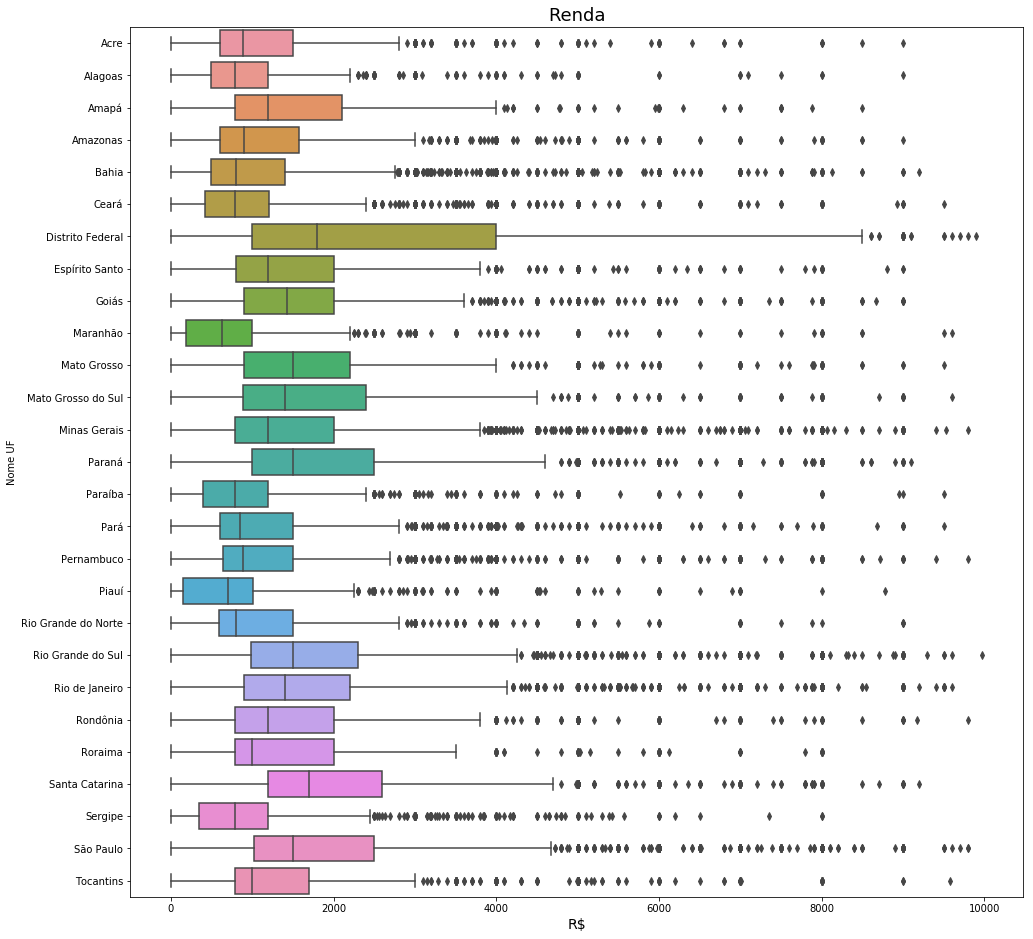

In [181]:
ax = sns.boxplot(x='Renda', y='Nome UF',
                 data=dados.query('Renda < 10000'), orient='h', order=ufs)
ax.figure.set_size_inches(16, 16)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

> ### Conclusões

Escreva suas conclusões aqui...